Refer to the wine quality dataset taken from UCI ML repository.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
wine_qual = pd.read_csv("C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Classification-Models-main/data/wine_quality.csv")
wine_qual.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Chech shape
wine_qual.shape

(1599, 12)

In [4]:
# Check missing values
wine_qual.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Check the target
wine_qual['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
# Fit the model
y = wine_qual['quality']
X = wine_qual.drop('quality', axis=1)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X,y)

yhat = model.predict_proba(X)
yhat

array([[0.00310163, 0.0222713 , 0.77476891, 0.17136495, 0.02070231,
        0.0077909 ],
       [0.00178994, 0.01879278, 0.67856873, 0.25837386, 0.03829204,
        0.00418265],
       [0.00163081, 0.02386827, 0.66625502, 0.26076709, 0.04061621,
        0.00686261],
       ...,
       [0.01495629, 0.03625428, 0.17519604, 0.59657616, 0.16051176,
        0.01650547],
       [0.01693823, 0.03370039, 0.44116679, 0.42822038, 0.06759698,
        0.01237723],
       [0.006032  , 0.07513339, 0.13234058, 0.55135301, 0.20974776,
        0.02539324]])

In [7]:
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt

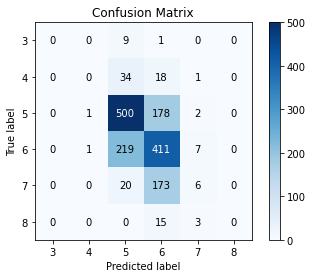

In [8]:
# Confusion Matrix
predictions = cross_val_predict(model, X, y)

skplt.metrics.plot_confusion_matrix(y, predictions)

plt.show()

In [9]:
# Precision, Recall, F1 Score
tp = 500      #true positive
tn = 178      #true negative
fp = 219      #false positive
fn = 411      #false negative

Precision = tp/(tp+fp)
Recall = tp/(tp+fn)

F1_score = 2*(Precision*Recall)/(Precision+Recall)

print(round(Precision,2))
print(round(Recall,2))
print(round(F1_score,2))

0.7
0.55
0.61
